# # Set 3 — Q5
**Task:** Detect **line segments** in a (given or derived) **binary image** using the **Hough Transform**.


In [1]:
# %%
# --- Imports & Config ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# === User: set your image path here ===
# If you already have a binary image, point to it. Otherwise, any photo is okay.
img_path = "../image2.jpg"   # <-- change this

out_dir = Path("./outputs_q5")
out_dir.mkdir(parents=True, exist_ok=True)

def imshow(ax, img, title="", cmap=None):
    ax.imshow(img if cmap is None else img, cmap=cmap)
    ax.set_title(title); ax.axis("off")

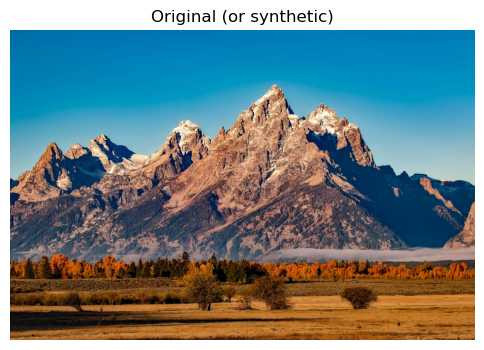

In [2]:
# %%
# --- Load image ---
img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img_bgr is None:
    # Fallback: create a synthetic binary image with multiple lines
    h, w = 360, 540
    synth = np.zeros((h, w), dtype=np.uint8)
    cv2.line(synth, (20, 40), (500, 320), 255, 3)
    cv2.line(synth, (40, 200), (520, 200), 255, 2)
    cv2.line(synth, (100, 340), (440, 20), 255, 2)
    cv2.rectangle(synth, (300, 50), (520, 120), 255, 2)
    # Convert to 3-channel for visualization
    img_rgb = cv2.cvtColor(synth, cv2.COLOR_GRAY2RGB)
    gray = synth.copy()
else:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,1, figsize=(6,5))
imshow(ax, img_rgb, "Original (or synthetic)")
plt.show()

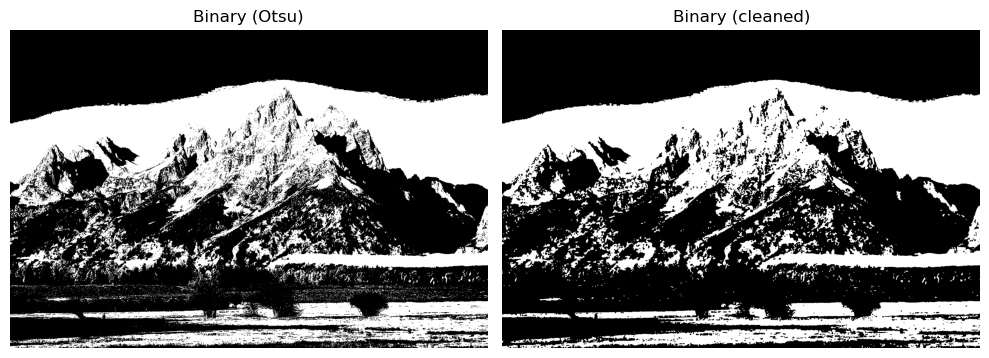

True

In [3]:
# %%
# --- Create/ensure a binary image ---
# If you already started with binary, Otsu will preserve it.
# Otherwise, it thresholds your grayscale to a clean binary.
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional cleanup: open & close to reduce noise / small gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
binary_clean = cv2.morphologyEx(binary_clean, cv2.MORPH_CLOSE, kernel, iterations=1)

fig, axs = plt.subplots(1,2, figsize=(10,4))
imshow(axs[0], binary, "Binary (Otsu)", cmap="gray")
imshow(axs[1], binary_clean, "Binary (cleaned)", cmap="gray")
plt.tight_layout(); plt.show()

cv2.imwrite(str(out_dir / "q5_binary.png"), binary)
cv2.imwrite(str(out_dir / "q5_binary_clean.png"), binary_clean)

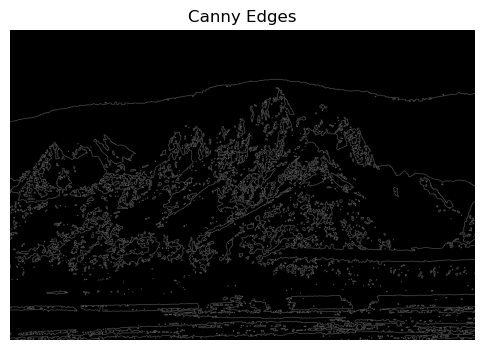

True

In [4]:
# %%
# --- Edge detection (Canny) ---
# Canny usually helps Hough. If you already have thin binary lines, this may be similar.
edges = cv2.Canny(binary_clean, 50, 150, apertureSize=3, L2gradient=True)

plt.figure(figsize=(6,5))
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")
plt.show()

cv2.imwrite(str(out_dir / "q5_edges.png"), edges)

Detected line segments: 880


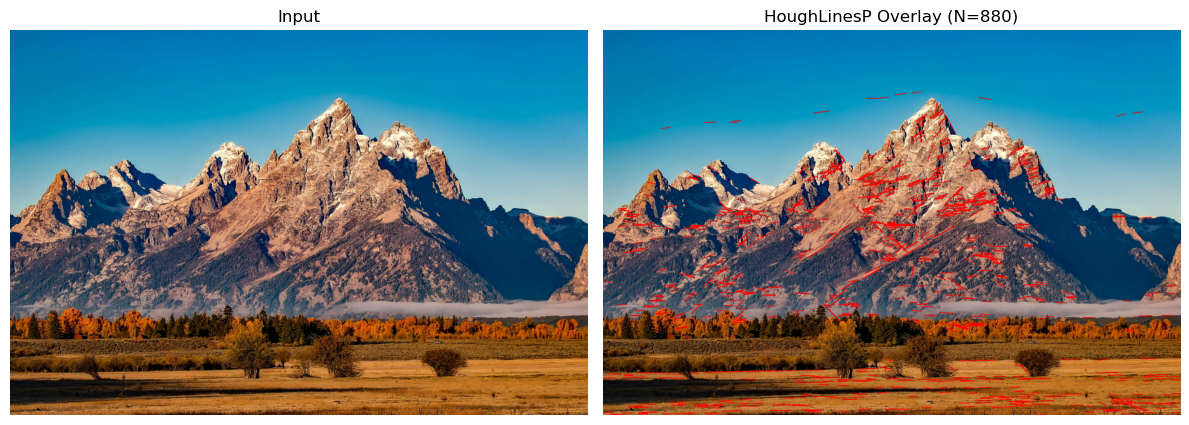

Saved outputs in: D:\git\Image and Video Processing\Lab_3\QUESTION5\outputs_q5


In [5]:
# %%
# --- Probabilistic Hough Transform to detect line segments ---
# Tunable parameters:
rho = 1                     # distance resolution in pixels
theta = np.pi / 180         # angle resolution in radians
threshold = 50              # min votes (accumulator threshold)
min_line_length = 30        # minimum length of a line (pixels)
max_line_gap = 10           # maximum gap between two points to be connected in a single line

lines_p = cv2.HoughLinesP(edges, rho, theta, threshold,
                          minLineLength=min_line_length,
                          maxLineGap=max_line_gap)

# Draw results
overlay = img_rgb.copy()
if len(overlay.shape) == 2:  # just in case it's grayscale, convert to RGB
    overlay = cv2.cvtColor(overlay, cv2.COLOR_GRAY2RGB)

count = 0
if lines_p is not None:
    for l in lines_p:
        x1, y1, x2, y2 = l[0]
        # Draw in red with thickness 2
        cv2.line(overlay, (x1, y1), (x2, y2), (255, 0, 0), 2)
        count += 1

print(f"Detected line segments: {count}")

fig, axs = plt.subplots(1,2, figsize=(12,5))
imshow(axs[0], img_rgb, "Input")
imshow(axs[1], overlay, f"HoughLinesP Overlay (N={count})")
plt.tight_layout(); plt.show()

cv2.imwrite(str(out_dir / "q5_lines_overlay.png"), cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))
print("Saved outputs in:", out_dir.resolve())